In [2]:
import numpy as np 
import matplotlib.pyplot as plt

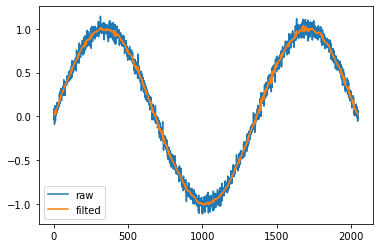

In [3]:
def cross_correlation_wiener(ts, new_order, old_order):
    n_taps = ts.size
    n_size = n_taps if n_taps>new_order else new_order
    out_data = []
    for i in range(-n_taps,n_taps+1):
        ts_sum = 0.0
        for j in range(n_size):
            if ((j+i)<n_taps and j<new_order and (j+i)>-1):
                ts_sum += ts[j+i]
        out_data.append(ts_sum)
    out = out_data[-old_order-n_taps-1:-old_order-1]
    return np.asarray(out)

def wiener_filter_1d(t_series,order):
    new_order = 2*order+1
    t_2_series = pow(t_series,2)
    t_lmean = cross_correlation_wiener(t_series, new_order, order)
    lmean = t_lmean/new_order
    t_lvar = cross_correlation_wiener(t_2_series, new_order, order)
    lvar = t_lvar/new_order - pow(lmean,2)
    est_n = sum(lvar)/lvar.size
    res = []
    for i in range(t_series.size):
        if lvar[i] <est_n:
            res.append(lmean[i])
        else:
            res.append((t_series[i]-lmean[i])*(1-(est_n/lvar[i]))+lmean[i])
    return np.asarray(res)

# 测试维纳滤波
np.random.seed(1)
t = np.linspace(0, 3*np.pi, 2048)
time_series = np.sin(t) + 0.05*np.random.standard_normal(size=2048)
order = 12
wf1d = wiener_filter_1d(time_series, order)
# print(wf1d)

plt.figure()
plt.plot(np.linspace(0,len(time_series), len(time_series)), time_series)
plt.plot(np.linspace(0,len(wf1d), len(wf1d)), wf1d)
plt.legend(['raw', 'filted'])
plt.show()